# Pseudo-Random Number Generators

In the following notebook, we will explore the PRNGs available in `ChaoticEncryption.jl`. The API documentation for `ChaoticEncryption.jl` is available here - https://saransh-cpp.github.io/ChaoticEncryption.jl.

Let us start by adding in the julia packages we will be needing -

In [1]:
using Pkg
Pkg.add("TestImages")
# Not available on JuliaHub right now, refer to https://github.com/Saransh-cpp/ChaoticEncryption.jl#installation for installation.
# Pkg.add("ChaoticEncryption") 

   Updating registry at `C:\Users\Saransh\.julia\registries\General`
  Resolving package versions...
Updating `C:\Users\Saransh\.julia\dev\ChaoticEncryption\Project.toml`
  [5e47fb64] + TestImages v1.6.2
Updating `C:\Users\Saransh\.julia\dev\ChaoticEncryption\Manifest.toml`
  [88034a9c] + StringDistances v0.11.2
  [5e47fb64] + TestImages v1.6.2


In [2]:
using TestImages
using ChaoticEncryption

## PRNGs in ChaoticEncryption.jl

Currently, `ChaoticEncryption.jl` includes 2 PRNGs, which are- 
1. Logistic Map
2. Lorenz System of Differential Equations

We will be adding more of them soon! If you stumble upon an interesting PRNG, feel free to create an issue or a pull request for the same!

## Logistic Map
### Accessing documentation

`Julia` offers an elegant way of reading the docstring associated with a function. Let us go through the docstring, or the documentation, of `logistic_key` -

In [3]:
?(logistic_key)

search: logistic_key



```
logistic_key(x_init, r, num_keys)
```

Generates pseudo-random keys using the Logistic Map.

The equation -

$$
x_{n+1} = r * x_{n} * (1 - x_{n})
$$

# Arguments

  * `x_init::Float64`: Initial value of x. x ϵ (0, 1).
  * `r::Float64`: A constant value. Values > 4 usually results in pseudo-random numbers.
  * `num_keys::Int64`: Number of keys to be generated.

# Returns

  * `keys::Array{Int64, 1}`: Generated pseudo-random keys.

# Example

```julia-repl
julia> logistic_key(0.01, 3.97, 20)
20-element Array{Int64,1}:
   0
  44
   7
  26
  14
 224
  16
 250
 162
 211
 200
 217
  97
 132
 134
 100
 135
 232
 122
```


### Using logistic_key

After going through the documentation, let us use the function `logistic_key` with the following aarguments -
- x_init = 0.01
- r = 3.97
- num_keys = 20

In [4]:
keys = logistic_key(0.01, 3.97, 20)

20-element Array{Int64,1}:
   0
  44
   7
  26
  14
 224
  16
 250
 162
 211
 200
 217
  97
 132
 134
 100
 135
 232
 122
 102

This returns a 1 dimensional `Array` of pseudo-random `Int64` elements ranging from 0 - 255 (as the RGB values of an image range from 0 - 255)!

### Generating pseudo-random keys for an image

Now we can try to generate a pseudo-random key for each pixel in a given image. Let us load an image using the `TestImages` package for this!

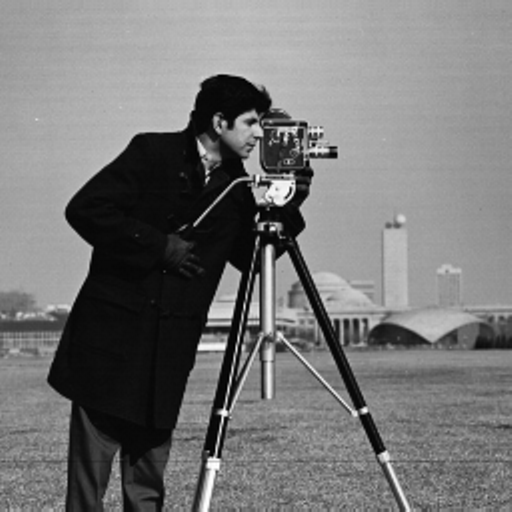

In [5]:
img = testimage("cameraman")

Retreiving the height and width of image

In [6]:
height, width = size(img)

(512, 512)

Generating a key for each pixel in the image

In [7]:
keys = logistic_key(0.01, 3.67, height * width)

262144-element Array{Int64,1}:
   0
  68
 135
  20
  13
 140
 197
 182
 248
 229
  29
 144
  97
   ⋮
  14
  27
  67
 168
 182
  77
  83
  74
 176
  27
 251
 206

We can now use these keys to encrypt the image! Encryption and decryption will be covered in another notebook :)

## Lorenz System of Differential Equations
### Accessing documentation

Let us go through the docstring, or the documentation, of `lorenz_key` -

In [8]:
?(lorenz_key)

search: lorenz_key



```
lorenz_key(x_init, y_init, z_init, num_keys, α=10.0, ρ=28.0, β=2.667, dt=0.01)
```

Generates 3 lists of pseudo-random numbers using Lorenz system of differential equations.

The equations -

$$
\frac{dx}{dt} = α * (y - x)
$$

$$
\frac{dy}{dt} = x * (ρ - z) - y
$$

$$
\frac{dz}{dt} = x * y - β * z
$$

# Arguments

  * `x_init::Float64`: Initial value of x.
  * `y_init::Float64`: Initial value of y.
  * `z_init::Float64:` Initial value of z.
  * `num_keys::Int64`: Number of keys (in a single list) to be generated.
  * `α::Float64`: Constant associated with Lorenz system of differential equations.
  * `ρ::Float64`: Constant associated with Lorenz system of differential equations.
  * `β::Float64`: Constant associated with Lorenz system of differential equations.

# Returns

  * `x::Array{Int64, 1}`: Generated pseudo-random keys corresponding to x values.
  * `y::Array{Int64, 1}`: Generated pseudo-random keys corresponding to y values.
  * `z::Array{Int64, 1}`: Generated pseudo-random keys corresponding to z values.

# Example

```julia-repl
julia> lorenz_key(0.01, 0.02, 0.03, 20)
([0, 0, 256, 24, 129, 42, 54, 134, 43, 179, 85, 19, 24, 44, 71, 210, 238, 152, 22, 27],
[0, 0, 240, 55, 25, 163, 89, 243, 123, 5, 197, 64, 227, 54, 188, 226, 154, 134, 64, 69],
[0, 0, 80, 227, 178, 204, 89, 33, 144, 139, 105, 208, 108, 155, 61, 254, 57, 102, 149, 47])
```


### Using lorenz_key

After going through the documentation, let us use the function `lorenz_key` with the following aarguments -
- x_init = 0.01
- y_init = 0.02
- z_init = 0.03
- num_keys = 20

You can play with other arguments as well!

In [9]:
keys = lorenz_key(0.01, 0.02, 0.03, 20)

([0, 0, 256, 24, 129, 42, 54, 134, 43, 179, 85, 19, 24, 44, 71, 210, 238, 152, 22, 27], [0, 0, 240, 55, 25, 163, 89, 243, 123, 5, 197, 64, 227, 54, 188, 226, 154, 134, 64, 69], [0, 0, 80, 227, 178, 204, 89, 33, 144, 139, 105, 208, 108, 155, 61, 254, 57, 102, 149, 47])

### Generating pseudo-random keys for an image

Now we can try to generate a pseudo-random key for each pixel in a given image. Let us load an image using the `TestImages` package for this!

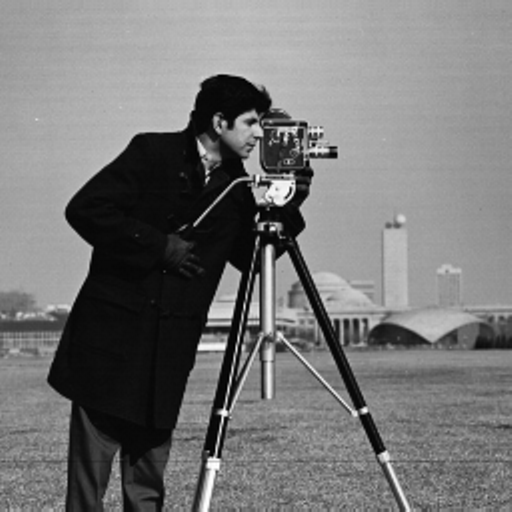

In [10]:
img = testimage("cameraman")

Retreiving the height and width of image

In [11]:
height, width = size(img)

(512, 512)

Generating a key for each pixel in the image

In [12]:
x, y, z = lorenz_key(0.01, 0.02, 0.03, height * width)

([0, 0, 256, 24, 129, 42, 54, 134, 43, 179  …  46, 94, 18, 206, 68, 98, 72, 10, 248, 136], [0, 0, 240, 55, 25, 163, 89, 243, 123, 5  …  4, 112, 116, 100, 108, 92, 236, 80, 152, 144], [0, 0, 80, 227, 178, 204, 89, 33, 144, 139  …  128, 48, 176, 128, 176, 72, 168, 32, 208, 112])

`lorenz_key` returns a `Tuple` with each element being an `Array{Int64, 1}`. Thus, it returns a variable of the type `Tuple{Array{Int64, 1}, Array{Int64, 1}, Array{Int64, 1}}`.

In [13]:
x

262144-element Array{Int64,1}:
   0
   0
 256
  24
 129
  42
  54
 134
  43
 179
  85
  19
  24
   ⋮
 136
 172
  46
  94
  18
 206
  68
  98
  72
  10
 248
 136

Don't forget to star [`ChaoticEncryption.jl`](https://saransh-cpp.github.io/ChaoticEncryption.jl) :)

For complete API Documentation, visit - https://saransh-cpp.github.io/ChaoticEncryption.jl
